In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Use the normal cumulative distribution function with the mean and standard deviation of female height to calculate the probability that a female's height is:

1. between 55.0 and 56.0 inches

2. is less than 5 feet (60 in)

3. is greater than than the mean (hint: do you know this answer intuitively?)



In [2]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRxp-hsw61ck9cpt5ExZIUhvSGT5zYzoUJl_7xr7YF5qZeazC8393q2taqwkDvMxVirgFDJm1WX3uAC/pub?output=csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
female = df.loc[df['Gender']=='Female'].copy() 

In [4]:
data = female['Height']

In [5]:
# various variables
low = 55
high = 56
mean = np.mean(data)
std = np.std(data)
min = np.min(data)
max = np.max(data)
xRange = np.linspace(min, max, 1000)

Text(0.5, 1.0, 'Normal cdf')

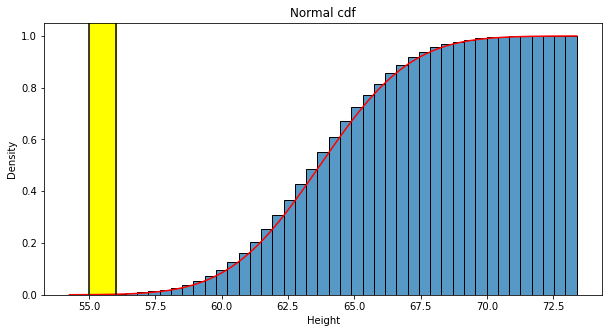

In [13]:
# cdf
cdf = stats.norm.cdf(xRange, loc=mean, scale=std)

# plot cdf
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(x=data, stat='density', cumulative=True)
ax.plot(xRange, cdf, color='red')
ax.axvline(low, color='black')
ax.axvline(high, color='black')
ax.axvspan(low, high, color='yellow', zorder=0)
ax.set_title('Normal cdf')

In [14]:
# calculate the probability that a female's height is: between 55.0 and 56.0in
stats.norm.cdf(high, loc=mean, scale=std) - stats.norm.cdf(low, loc=mean, 
                                                           scale=std)

0.0015043054289559745

There is a .15% probability that a female's height is between 55-56 in.

In [15]:
# calculate the probability that a female's height is less than 5 feet (60 in)
stats.norm.cdf(60, loc=mean, scale=std)

0.0844649272520746

There is a 8.4% probability that a female's height is less than 5 feet.

In [16]:
# calculate the probability that a female's height is greater than than the 
# mean (hint: do you know this answer intuitively?)
1 - stats.norm.cdf(mean, loc=mean, scale=std)

0.5

In a normal distribution, half the data is below the mean and the other half above so intuitively I'd say the probability is 50%. This was confirmed above^